In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#Create engine using the 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
#reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DBs
session = Session(engine)

In [11]:
(session.query(Measurement.prcp, Station.id)).all()

[(0.08, 1),
 (0.08, 2),
 (0.08, 3),
 (0.08, 4),
 (0.08, 5),
 (0.08, 6),
 (0.08, 7),
 (0.08, 8),
 (0.08, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (None, 1),
 (None, 2),
 (None, 3),
 (None, 4),
 (None, 5),
 (None, 6),
 (None, 7),
 (None, 8),
 (None, 9),
 (0.06, 1),
 (0.06, 2),
 (0.06, 3),
 (0.06, 4),
 (0.06, 5),
 (0.06, 6),
 (0.06, 7),
 (0.06, 8),
 (0.06, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.0, 1),
 (0.0, 2),
 (0.0, 3),
 (0.0, 4),
 (0.0, 5),
 (0.0, 6),
 (0.0, 7),
 (0.0, 8),
 (0.0, 9),
 (0.01, 1),
 (0.01, 2),
 (0.01, 3),
 (0.01, 4),
 (0.01, 5),
 (0.01, 6),
 (0.01, 7)

# Exploratory Climate Analysis

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=last_year).all()



In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_1yr=pd.DataFrame(results).set_index('date')
df_1yr

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [15]:
# Sort the dataframe by date
df_1yr = df_1yr.sort_index(ascending=True)
#print(df_1yr)

<Figure size 720x576 with 0 Axes>

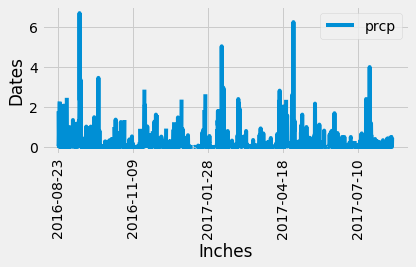

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
#Bar plot using pandas and the df or series
plt.figure(figsize= (10,8))
df_1yr.plot(rot=90)
plt.xlabel('Inches')
plt.ylabel('Dates')
plt.tight_layout()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_1yr.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(Station).count()
station_count

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs=session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.date >=last_year).filter(Measurement.station=='USC00519281').all()

In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temp_obs_df=pd.DataFrame(temp_obs).set_index('date')

<Figure size 720x576 with 0 Axes>

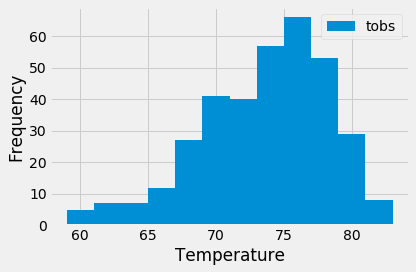

In [41]:
plt.figure(figsize= (10,8))
temp_obs_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [71]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_travel = calc_temps('2017-03-04', '2017-03-18')
my_travel

[(62.0, 70.92307692307692, 82.0)]

In [70]:
max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
max_date[0][0]

'2017-08-23'

In [91]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_yearly = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
    Station.elevation).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date >=last_year)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

In [100]:
#Create DataFrame

rainfall_yearly_df=pd.DataFrame(rainfall_yearly)
rainfall_yearly_df.head()
                            

,station,name,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


In [101]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]